In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

In [13]:
x = np.array([[2,6], [3,4], [3,8], [4,7], [6,2], [6,4],[7,3],[7,4],[8,5],[7,6]])

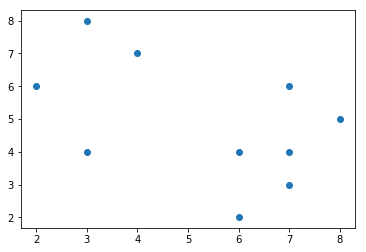

In [14]:
plt.scatter(x[:,0],x[:,1])
plt.show()

In [5]:
D = pairwise_distances(x, metric='manhattan')

In [10]:
import pyclustering

In [12]:
pyclustering.cluster.kmedians(D, 2)

AttributeError: module 'pyclustering' has no attribute 'cluster'

In [9]:
 from sklearn.medoids import k_medoids

ModuleNotFoundError: No module named 'sklearn.medoids'

In [6]:
M, C = kmedoids.kMedoids(D, 2)

NameError: name 'kmedoids' is not defined

In [30]:
class K_Medoids:
    def __init__(self, k = 2, max_iter = 1000):
        self.k = k
        self.max_iter = max_iter
        
    
    def fit(self, data):
        self.medians = []
        for i in range(self.k):
            self.medians.append(data[i])
        self.labels = []
        for it in range(self.max_iter):
            cluster_points = []
            for i in range(self.k):
                cluster_points.append([])
            cost=0
            for point in data:
                distances = [np.fabs((point - m)).sum() for m in self.medians]
                min_distance = min(distances)
                cost+=min_distance
                classification = distances.index(min_distance)
                cluster_points[classification].append(point)
        
            for i in range(self.k): #for every cluster_median_point
                new_cost=0
                for j in cluster_points[i]:
                    for point in data:
                        old_median=self.medians[i]
                        self.medians[i]=j
                        distances = [np.fabs((point - m)).sum() for m in self.medians]
                        min_distance = min(distances)
                        new_cost+=min_distance
                        if new_cost>cost:
                            self.medians[i]=old_median
                        
            self.labels = self.predict(data)
    
    def predict(self, test_data):
        cluster_pred = []
        for point in test_data:
            distances = [np.fabs((point - m)).sum() for m in self.medians]
            min_distance = min(distances)
            classification = distances.index(min_distance)
            cluster_pred.append(classification)
        return cluster_pred

In [31]:
c = K_Medoids()
c.k

2

In [32]:
x = np.array([[2,6], [3,4], [3,8], [4,7], [6,2], [6,4],[7,3],[7,4],[8,5],[7,6]])
c.fit(x)

In [33]:
c.labels

[0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

In [35]:
c.medians

[array([2, 6]), array([6, 4])]

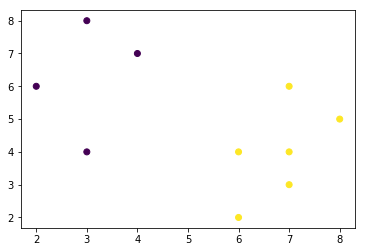

In [34]:
plt.scatter(x[:,0], x[:,1], c=c.labels)
plt.show()